In [1]:
#dood, deep learning is hard. You do not need this unless you are a engineer.
#I will only post anime deep learning models for this reason.
#it is so pedantic and taxes my PC. LTSMs are lit tho~~~`

import os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


sns.set(font_scale=2)

data_dir = "C:/ML/deep_learning/"

os.listdir(data_dir)

train_dir = "C:/ML/deep_learning/train"
test_dir = "C:/ML/deep_learning/test"

os.listdir(train_dir)
os.listdir(test_dir)


classes = ['NORMAL','PNEUMONIA']



NORMAL = []
PNEUMONIA = []








train_data_generator = ImageDataGenerator(rescale= 1./255,
                                          zoom_range=0.2,
                                          rotation_range=15,
                                          horizontal_flip=True)



test_data_generator = ImageDataGenerator(rescale= 1. / 255)


training_data = train_data_generator.flow_from_directory(train_dir,
                                                         target_size=(255,255),
                                                         batch_size=16,
                                                         class_mode='categorical',
                                                         shuffle=True)

testing_data = test_data_generator.flow_from_directory(test_dir,
                                                       target_size=(255,255),
                                                       batch_size=16,
                                                       class_mode='categorical',
                                                       shuffle=False)


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


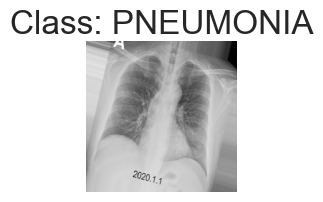

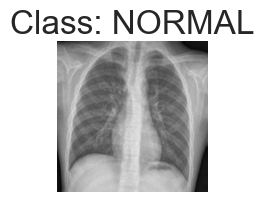

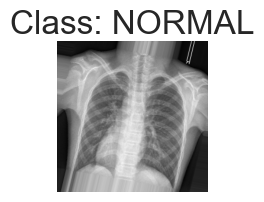

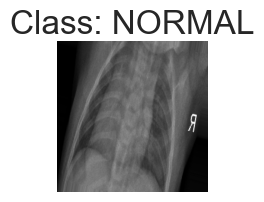

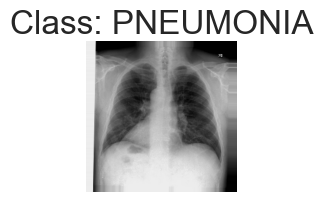

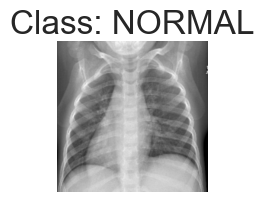

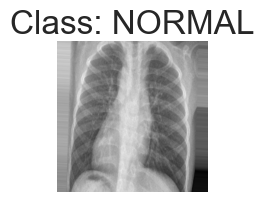

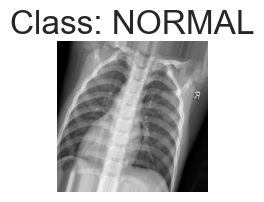

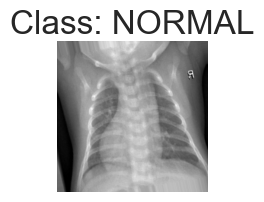

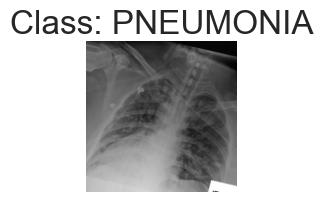

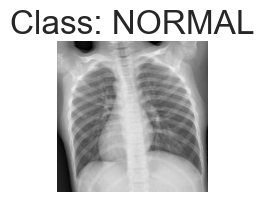

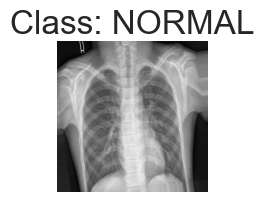

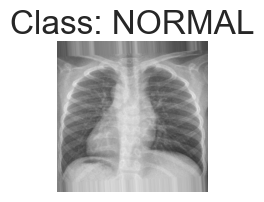

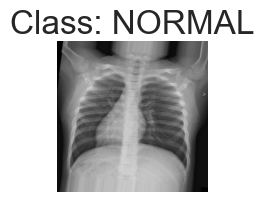

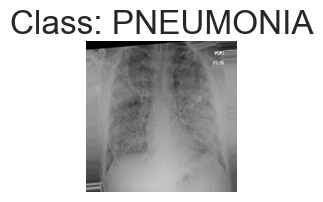

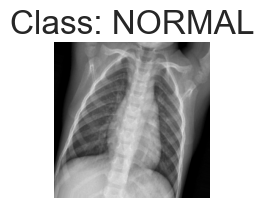

In [2]:
for i in range(16):
    plt.figure(figsize=(16, 9))
    plt.subplot(4, 4, i + 1)
    batch = next(training_data)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)
    plt.title(f'Class: {classes[np.argmax(label)]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D


CNN = Sequential()
CNN.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=(255,255,3)))
CNN.add(MaxPool2D(pool_size=(2,2)))

CNN.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
CNN.add(MaxPool2D(pool_size=(2,2)))
CNN.add(Flatten())
CNN.add(Dense(units=128,activation='relu'))
CNN.add(Dense(units=2, activation='sigmoid'))
CNN.summary()
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = CNN.fit(training_data,epochs=10,validation_data=testing_data)
loss, accuracy = CNN.evaluate(testing_data)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 128)               6

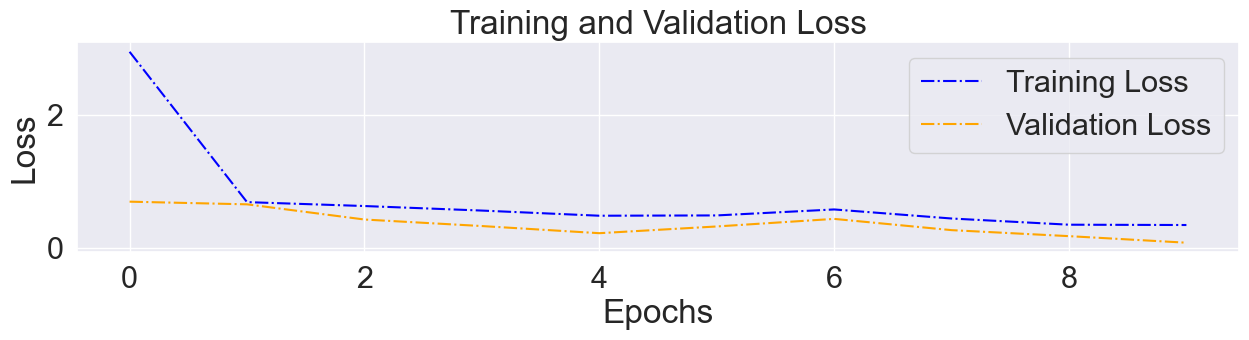

In [6]:
plt.figure(figsize=(15,6))


plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-.')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-.')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()





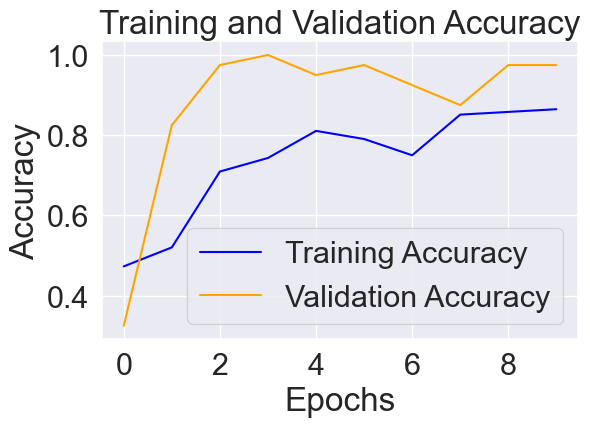

In [8]:

plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()